# Classification iris flowers

In [2]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
iris = datasets.load_iris()
iris_df = pd.concat([pd.DataFrame(data=iris["data"], columns=iris["feature_names"]),pd.DataFrame(data=iris["target"], columns=["target"])],axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Plot SVM with variables sepal length & width

In [12]:
X = iris_df.iloc[:,:2].values
Y = iris_df["target"].values

In [15]:
x0_min, x0_max = X[:,0].min()-1, X[:,0].max()+1
h0 = (x0_max - x0_min)/100
x1_min, x1_max = X[:,1].min()-1, X[:,1].max()+1
h1 = (x1_max - x1_min)/100

xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h0), np.arange(x1_min, x1_max, h1))

X_plot = np.c_[xx0.ravel(), xx1.ravel()]

### Linear Kernel

In [16]:
C = 1.
svc = svm.SVC(kernel="linear",C=C,decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot).reshape(xx0.shape)

Text(0.5, 1.0, 'SVC iris flowers, linear kernel')

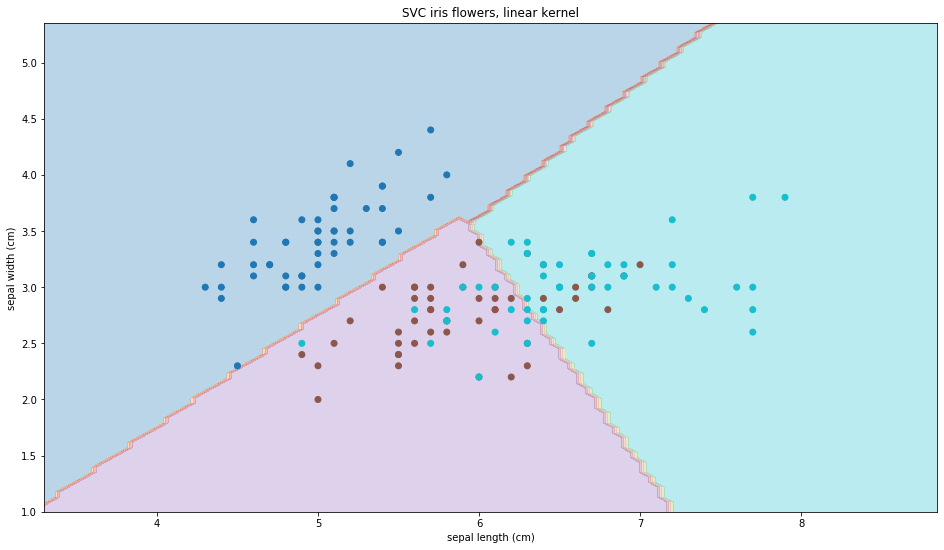

In [20]:
plt.figure(figsize=(16,9))
plt.contourf(xx0, xx1, Ypred, cmap=plt.cm.tab10, alpha=.3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.tab10)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("SVC iris flowers, linear kernel")

### Radial Basis Function

In [21]:
C = 1.
svc = svm.SVC(kernel="rbf",C=C,decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot).reshape(xx0.shape)

Text(0.5, 1.0, 'SVC iris flowers, RBF kernel')

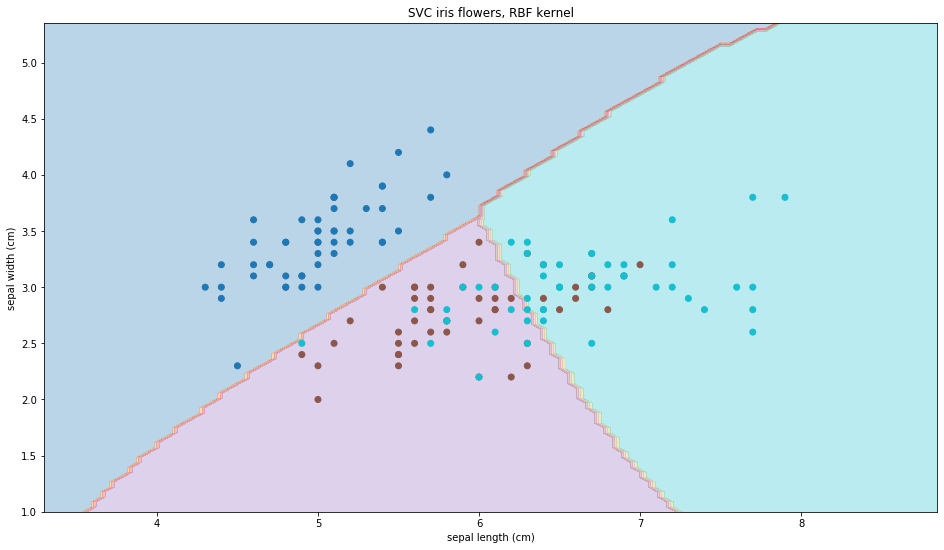

In [23]:
plt.figure(figsize=(16,9))
plt.contourf(xx0, xx1, Ypred, cmap=plt.cm.tab10, alpha=.3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.tab10)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("SVC iris flowers, RBF kernel")

### Sigmoid

Text(0.5, 1.0, 'SVC iris flowers, Sigmoid kernel')

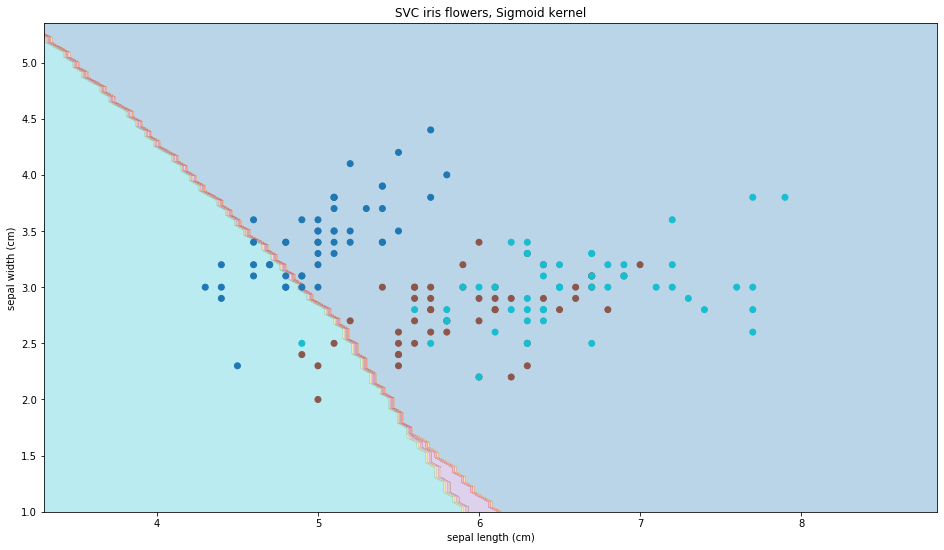

In [24]:
C = 1.
svc = svm.SVC(kernel="sigmoid",C=C,decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot).reshape(xx0.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx0, xx1, Ypred, cmap=plt.cm.tab10, alpha=.3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.tab10)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("SVC iris flowers, Sigmoid kernel")

### Polynomial

Text(0.5, 1.0, 'SVC iris flowers, Poly kernel')

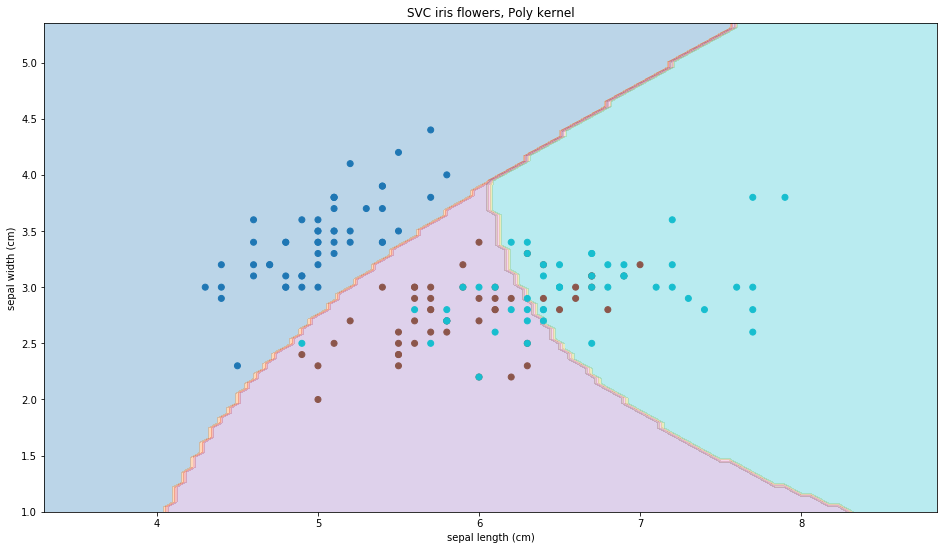

In [25]:
C = 1.
svc = svm.SVC(kernel="poly",C=C,decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot).reshape(xx0.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx0, xx1, Ypred, cmap=plt.cm.tab10, alpha=.3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.tab10)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("SVC iris flowers, Poly kernel")

# Grid Search for Hyperparams on SVM

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [27]:
X, Y = shuffle(X, Y, random_state=0)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=0)

In [29]:
parameters = [
    {
        "kernel": ["rbf"],
        "gamma":[1e-4, 1e-3, 1e-2, .1, .2, .5],
        "C":[1,10,100,1000]
    },
    {
        "kernel" : ["linear"],
        "C" : [1, 10, 100, 1000]
    }
]

In [30]:
clf = GridSearchCV(svm.SVC(decision_function_shape="ovr"), param_grid=parameters, cv=5).fit(X,Y)

In [31]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [32]:
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
params = clf.cv_results_["params"]
for m, s, p in zip(means, stds, params):
    print("%0.3f +/- %0.3f for %r"%(m, 2*s, p))

0.747 +/- 0.124 for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 +/- 0.124 for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.747 +/- 0.124 for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.807 +/- 0.129 for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.787 +/- 0.124 for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.780 +/- 0.116 for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 +/- 0.124 for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 +/- 0.124 for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 +/- 0.124 for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.773 +/- 0.098 for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.780 +/- 0.116 for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.767 +/- 0.126 for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 +/- 0.124 for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813 +/- 0.124 for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.760 +/- 0.107 for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.780 +/- 0.080 for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.773 +/

In [33]:
ypred = clf.predict(X_test)

In [34]:
# 0: setosa, 1: versicolor, 2: virginica
print(classification_report(Y_test, ypred, target_names=["setosa", "versicolor", "virginica"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.60      0.82      0.69        11
   virginica       0.83      0.62      0.71        16

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38



# Resumen final de la clasificación de iris

In [35]:
def svm_iris(C=1.,gamma=.01,kernel="rbf"):
    import pandas as pd
    import numpy as np
    from sklearn import svm, datasets
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    iris = datasets.load_iris()
    iris_df = pd.concat([pd.DataFrame(data=iris["data"], columns=iris["feature_names"]),pd.DataFrame(data=iris["target"], columns=["target"])],axis=1)
    
    X = iris_df.iloc[:,:2].values
    Y = iris_df["target"].values
    
    x0_min, x0_max = X[:,0].min()-1, X[:,0].max()+1
    h0 = (x0_max - x0_min)/100
    x1_min, x1_max = X[:,1].min()-1, X[:,1].max()+1
    h1 = (x1_max - x1_min)/100

    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h0), np.arange(x1_min, x1_max, h1))

    X_plot = np.c_[xx0.ravel(), xx1.ravel()]
    
    svc = svm.SVC(kernel=kernel,C=C,gamma=gamma,decision_function_shape="ovr").fit(X,Y)
    Ypred = svc.predict(X_plot).reshape(xx0.shape)
    plt.figure(figsize=(16,9))
    plt.contourf(xx0, xx1, Ypred, cmap=plt.cm.tab10, alpha=.3)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.tab10)
    plt.xlabel("sepal length (cm)")
    plt.ylabel("sepal width (cm)")
    plt.title("SVC iris flowers, Poly kernel")

In [36]:
from ipywidgets import interact, fixed

In [37]:
interact(svm_iris, 
         C=[.01,.1,1,100,1000,1e6,1e10],
         gamma=[1e-5,1e-4,1e-3,1e-2,.1,.2,.5,.99],
         kernel=["rbf","linear","sigmoid","poly","precomputed"]
        )

interactive(children=(Dropdown(description='C', index=2, options=(0.01, 0.1, 1, 100, 1000, 1000000.0, 10000000…

<function __main__.svm_iris(C=1.0, gamma=0.01, kernel='rbf')>